In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress
import sklearn

In [2]:
csv_path = "../DataCleaning/CleanedMLSData.csv"
mls_data = pd.read_csv(csv_path)
mls_data

,MLS #,Status,Address,City,Zip Code,List Price,Original List Price,SqFt Total,Close Price,RATIO Current Price By SQFT,...,Status Change Timestamp,List Agent Full Name,Buyers/SubAgent Full Name,HOA,MLS SubArea,Property Sub Type,Property Type,RATIO Close Price By List Price,School District,Subdivision Name
0,14112331,S,452 Vincent Street,Cedar Hill,75104,95000.0,95000.0,1310.0,109300.0,83.44,...,2019-07-04,Krista Stotler,Cassandra Jones,None,CEDAR HILL (10),RES-Single Family,Residential,1.15053,Cedar Hill ISD,Highlands 03 & 08 02 Rep
1,14075152,S,914 S Cedar Hill Road,Cedar Hill,75104,119000.0,119000.0,1260.0,111268.0,88.31,...,2019-06-06,Leslie Armstrong,Carlos Silva,None,CEDAR HILL (13),RES-Single Family,Residential,0.93503,Cedar Hill ISD,Cedar Hill
2,14088584,S,1015 Vedral Place,Cedar Hill,75104,110000.0,110000.0,1002.0,112000.0,111.78,...,2019-06-03,Richard Garropy,Mayra Cardenas,Mandatory,CEDAR HILL (3),RES-Condo,Residential,1.01818,Cedar Hill ISD,Cedars Condo
3,14086347,S,309 Aquarius Drive,Cedar Hill,75104,129900.0,129900.0,1085.0,120000.0,110.60,...,2019-06-24,Dianna Jones,Dianna Jones,None,CEDAR HILL (13),RES-Single Family,Residential,0.92379,Cedar Hill ISD,South Hills Park 01
4,14094254,S,1114 Saturn Drive,Cedar Hill,75104,119900.0,119900.0,1031.0,120000.0,116.39,...,2019-06-25,Gail Griggs,Angela Hudson,None,CEDAR HILL (13),RES-Single Family,Residential,1.00083,Cedar Hill ISD,South Hills Park 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170552,13964772,C,4885 Autumn,Grand Prairie,75052,315000.0,315000.0,3542.0,NaN,88.93,...,2019-01-28,Sara Benavidez,NaN,None,NO SUB-AREA (0),RES-Single Family,Residential,NaN,Grand Prairie ISD,Westchester Valley Ph 02
170553,14067687,C,2112 La Salle Trail,Grand Prairie,75052,329900.0,329900.0,3841.0,NaN,85.89,...,2019-04-30,Kyra Porter,NaN,None,NO SUB-AREA (0),RES-Single Family,Residential,NaN,Grand Prairie ISD,Lake Parks Ph 2b
170554,14032139,C,5168 Finnhorse Drive,Grand Prairie,75052,330000.0,350000.0,2933.0,NaN,112.51,...,2019-04-17,Starling Oliver,NaN,Mandatory,NO SUB-AREA (0),RES-Single Family,Residential,NaN,Grand Prairie ISD,Polo Heights Ph 02
170555,14085242,C,2231 Palmer Trail,Grand Prairie,75052,360000.0,360000.0,3094.0,NaN,116.35,...,2019-05-13,Jennifer Davies,NaN,Mandatory,NO SUB-AREA (0),RES-Single Family,Residential,NaN,Grand Prairie ISD,High Hawk at Martins Meadow


In [3]:
mls_data.dtypes

MLS #                                int64
Status                              object
Address                             object
City                                object
Zip Code                             int64
List Price                         float64
Original List Price                float64
SqFt Total                         float64
Close Price                        float64
RATIO Current Price By SQFT        float64
Number Of Stories                  float64
Beds Total                           int64
Baths Total                        float64
Parking Spaces Garage              float64
Lot Size Area                      float64
Yr Built                           float64
Pool                                object
DOM                                  int64
Listing Date                        object
Close Date                          object
Expiration Date                     object
Cancelled Date                      object
Status Change Timestamp             object
List Agent 

In [4]:
sqft_data = mls_data[['SqFt Total','Close Price',]]
sqft_data = sqft_data.dropna()


,SqFt Total,Close Price
0,1310.0,109300.0
1,1260.0,111268.0
2,1002.0,112000.0
3,1085.0,120000.0
4,1031.0,120000.0
...,...,...
133240,1806.0,231467.0
133241,2158.0,267875.0
133242,2642.0,279827.0
133243,2642.0,298010.0


In [5]:
mls_data[["Listing Date"]] = pd.to_datetime(mls_data["Listing Date"], format='%Y-%m-%d')
mls_data[["Close Date"]] = pd.to_datetime(mls_data["Close Date"], format='%Y-%m-%d')
mls_data.head()

,MLS #,Status,Address,City,Zip Code,List Price,Original List Price,SqFt Total,Close Price,RATIO Current Price By SQFT,...,Status Change Timestamp,List Agent Full Name,Buyers/SubAgent Full Name,HOA,MLS SubArea,Property Sub Type,Property Type,RATIO Close Price By List Price,School District,Subdivision Name
0,14112331,S,452 Vincent Street,Cedar Hill,75104,95000.0,95000.0,1310.0,109300.0,83.44,...,2019-07-04,Krista Stotler,Cassandra Jones,None,CEDAR HILL (10),RES-Single Family,Residential,1.15053,Cedar Hill ISD,Highlands 03 & 08 02 Rep
1,14075152,S,914 S Cedar Hill Road,Cedar Hill,75104,119000.0,119000.0,1260.0,111268.0,88.31,...,2019-06-06,Leslie Armstrong,Carlos Silva,None,CEDAR HILL (13),RES-Single Family,Residential,0.93503,Cedar Hill ISD,Cedar Hill
2,14088584,S,1015 Vedral Place,Cedar Hill,75104,110000.0,110000.0,1002.0,112000.0,111.78,...,2019-06-03,Richard Garropy,Mayra Cardenas,Mandatory,CEDAR HILL (3),RES-Condo,Residential,1.01818,Cedar Hill ISD,Cedars Condo
3,14086347,S,309 Aquarius Drive,Cedar Hill,75104,129900.0,129900.0,1085.0,120000.0,110.60,...,2019-06-24,Dianna Jones,Dianna Jones,None,CEDAR HILL (13),RES-Single Family,Residential,0.92379,Cedar Hill ISD,South Hills Park 01
4,14094254,S,1114 Saturn Drive,Cedar Hill,75104,119900.0,119900.0,1031.0,120000.0,116.39,...,2019-06-25,Gail Griggs,Angela Hudson,None,CEDAR HILL (13),RES-Single Family,Residential,1.00083,Cedar Hill ISD,South Hills Park 01


In [12]:
mls_data_clean = mls_data[['Address','City','Zip Code','List Price','Original List Price',
                           'Close Price','Listing Date','Close Date']]
mls_data_clean = mls_data_clean.dropna(how='any')
mls_data_clean


sqft_data = mls_data[['SqFt Total','Close Price','Close Date']]
sqft_data = sqft_data.dropna(how='any')
sqft_data

,SqFt Total,Close Price,Close Date
0,1310.0,109300.0,2019-06-25
1,1260.0,111268.0,2019-06-04
2,1002.0,112000.0,2019-05-31
3,1085.0,120000.0,2019-06-21
4,1031.0,120000.0,2019-06-04
...,...,...,...
167636,1806.0,231467.0,2016-09-30
167637,2158.0,267875.0,2016-09-30
167638,2642.0,279827.0,2016-07-29
167639,2642.0,298010.0,2016-09-30


In [13]:
sqft_data['Close Year'] = pd.DatetimeIndex(sqft_data['Close Date']).year
sqft_data['Price/SqFt'] = sqft_data['Close Price']/sqft_data['SqFt Total']
sqft_data.replace([np.inf, -np.inf], np.nan, inplace=True)
sqft_data = sqft_data.reset_index(drop=True)
sqft_data

,SqFt Total,Close Price,Close Date,Close Year,Price/SqFt
0,1310.0,109300.0,2019-06-25,2019,83.435115
1,1260.0,111268.0,2019-06-04,2019,88.307937
2,1002.0,112000.0,2019-05-31,2019,111.776447
3,1085.0,120000.0,2019-06-21,2019,110.599078
4,1031.0,120000.0,2019-06-04,2019,116.391853
...,...,...,...,...,...
133240,1806.0,231467.0,2016-09-30,2016,128.165559
133241,2158.0,267875.0,2016-09-30,2016,124.131140
133242,2642.0,279827.0,2016-07-29,2016,105.914837
133243,2642.0,298010.0,2016-09-30,2016,112.797123


In [8]:
df=sqft_data[['Close Year','Price/SqFt']]
df

,Close Year,Price/SqFt
0,2019,83.435115
1,2019,88.307937
2,2019,111.776447
3,2019,110.599078
4,2019,116.391853
...,...,...
167636,2016,128.165559
167637,2016,124.131140
167638,2016,105.914837
167639,2016,112.797123


In [9]:
df_mean = df.groupby('Close Year').mean()
df_mean.round()

,Price/SqFt
Close Year,
2016,137.0
2017,150.0
2018,158.0
2019,160.0
2020,172.0
2021,189.0


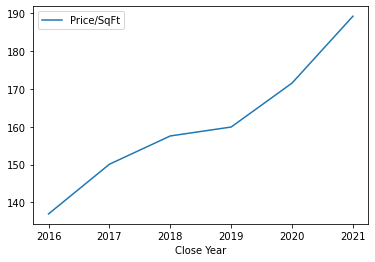

In [68]:
df_mean.plot(kind='line')
plt.savefig("Output/SqFt_line.png")

In [14]:
Q1 = np.percentile(sqft_data['SqFt Total'], 25, interpolation = 'midpoint')
Q3 = np.percentile(sqft_data['SqFt Total'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", sqft_data.shape) 
upper = np.where(sqft_data['SqFt Total'] >= (Q3+1.5*IQR))
lower = np.where(sqft_data['SqFt Total'] <= (Q1-1.5*IQR))
sqft_data.drop(upper[0], inplace = True)
sqft_data.drop(lower[0], inplace = True)
print("New Shape: ", sqft_data.shape) 

Old Shape:  (133245, 5)
New Shape:  (126972, 5)


In [60]:
six_df = sqft_data[sqft_data['Close Year']<2017]
sev_df = sqft_data[(sqft_data['Close Year']>2016)&(sqft_data['Close Year']<2018)]
eight_df = sqft_data[(sqft_data['Close Year']>2017)&(sqft_data['Close Year']<2019)]
nin_df = sqft_data[(sqft_data['Close Year']>2018)&(sqft_data['Close Year']<2020)]
twen_df = sqft_data[(sqft_data['Close Year']>2019)&(sqft_data['Close Year']<2021)]
one_df = sqft_data[sqft_data['Close Year']>2020]


,SqFt Total,Close Price,Close Date,Close Year,Price/SqFt
58812,1320.0,140000.0,2021-03-29,2021,106.060606
58813,1320.0,155000.0,2021-03-22,2021,117.424242
58814,1350.0,176645.0,2021-04-02,2021,130.848148
58815,1320.0,187000.0,2021-04-07,2021,141.666667
58816,1637.0,205000.0,2021-03-22,2021,125.229078
...,...,...,...,...,...
117539,1909.0,275000.0,2021-02-18,2021,144.054479
117540,1999.0,278000.0,2021-01-11,2021,139.069535
117541,1548.0,302490.0,2021-02-12,2021,195.406977
117542,2642.0,305000.0,2021-03-05,2021,115.442846


The r-squared is: 0.4053129925858499


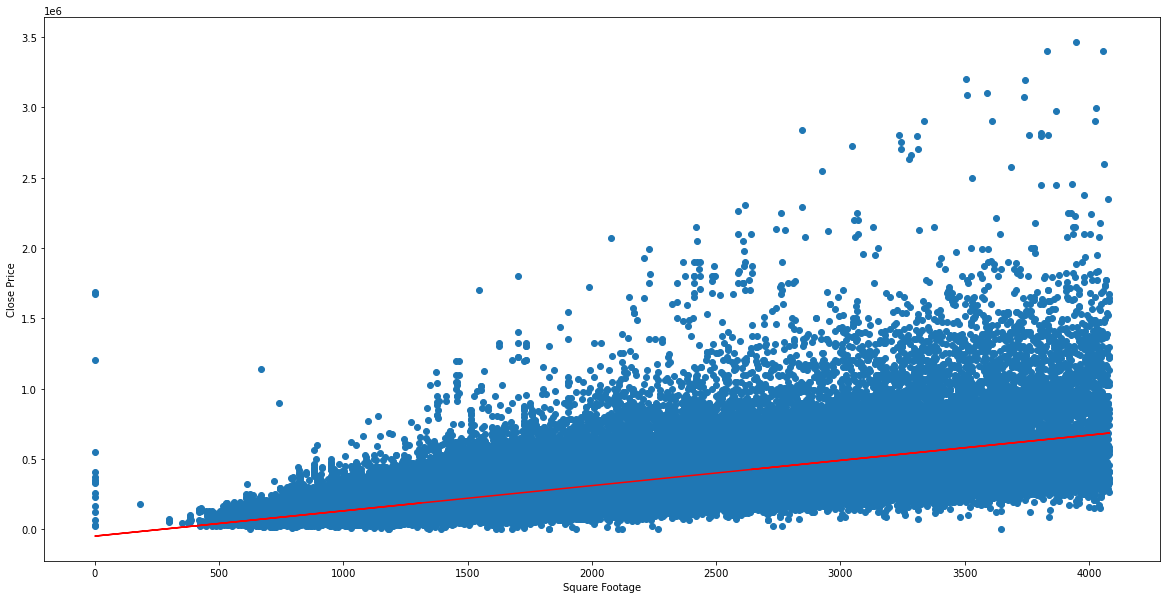

<Figure size 432x288 with 0 Axes>

In [69]:
x = sqft_data['SqFt Total']
y = sqft_data['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Square Footage')
plt.ylabel('Close Price')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Price_sqft_total")

The r-squared is: 0.39623848096370523


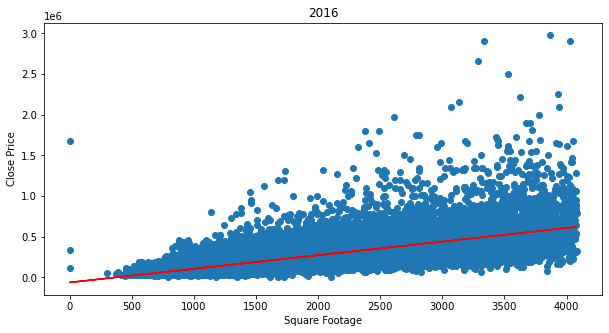

<Figure size 432x288 with 0 Axes>

In [70]:
#2016
x = six_df['SqFt Total']
y = six_df['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Square Footage')
plt.ylabel('Close Price')
plt.title('2016')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Price_sqft_2016")

The r-squared is: 0.40142340736370297


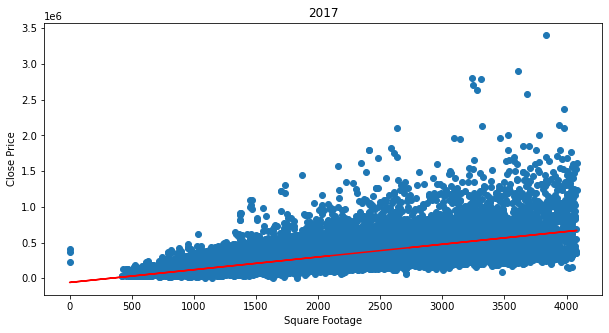

<Figure size 432x288 with 0 Axes>

In [71]:
#2017
x = sev_df['SqFt Total']
y = sev_df['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Square Footage')
plt.ylabel('Close Price')
plt.title('2017')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Price_sqft_2017")

The r-squared is: 0.39954448507549933


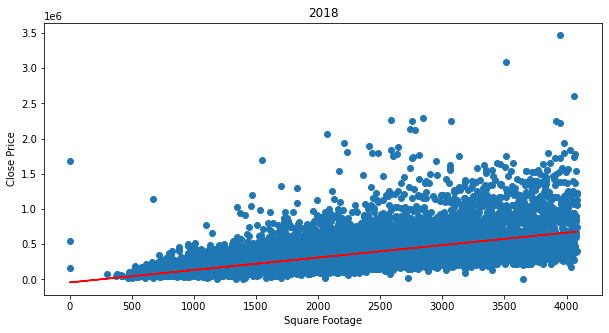

<Figure size 432x288 with 0 Axes>

In [72]:
#2018
x = eight_df['SqFt Total']
y = eight_df['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Square Footage')
plt.ylabel('Close Price')
plt.title('2018')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Price_sqft_2018")

The r-squared is: 0.4225524940757705


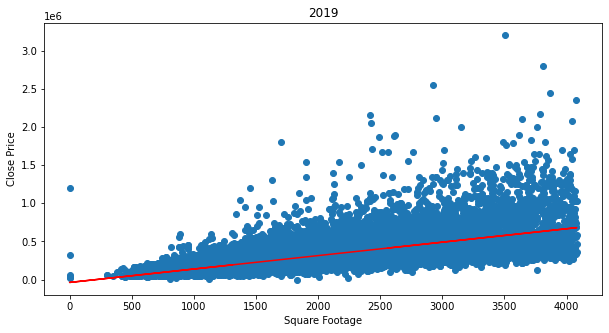

<Figure size 432x288 with 0 Axes>

In [73]:
#2019
x = nin_df['SqFt Total']
y = nin_df['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Square Footage')
plt.ylabel('Close Price')
plt.title('2019')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Price_sqft_2019")

The r-squared is: 0.4309683543014552


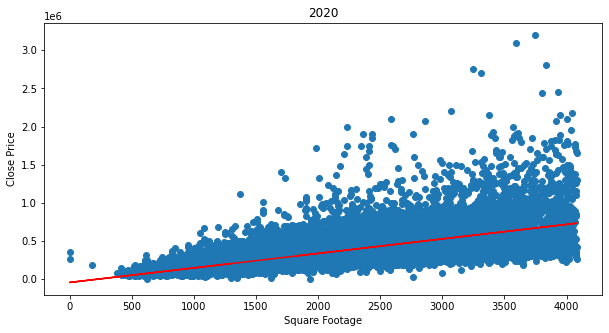

<Figure size 432x288 with 0 Axes>

In [74]:
#2020
x = twen_df['SqFt Total']
y = twen_df['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Square Footage')
plt.ylabel('Close Price')
plt.title('2020')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Price_sqft_2020")

The r-squared is: 0.4264666569952017


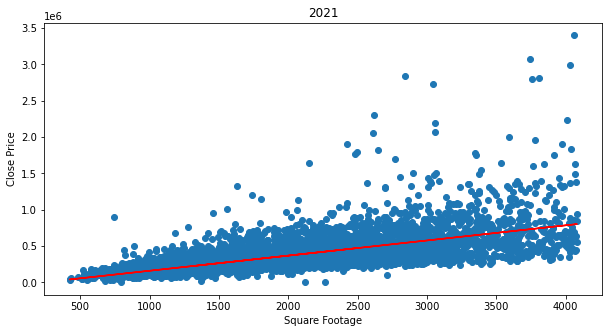

<Figure size 432x288 with 0 Axes>

In [75]:
#2021
x = one_df['SqFt Total']
y = one_df['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Square Footage')
plt.ylabel('Close Price')
plt.title('2021')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Price_sqft_2021")